# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

17 campaigns

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [11]:
import time
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [12]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [13]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [14]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

We don't see any null values so we will be using all the features that are given to us

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### Comparing relationship between numberical columns separated by 'y' value

C:\Users\zeged\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


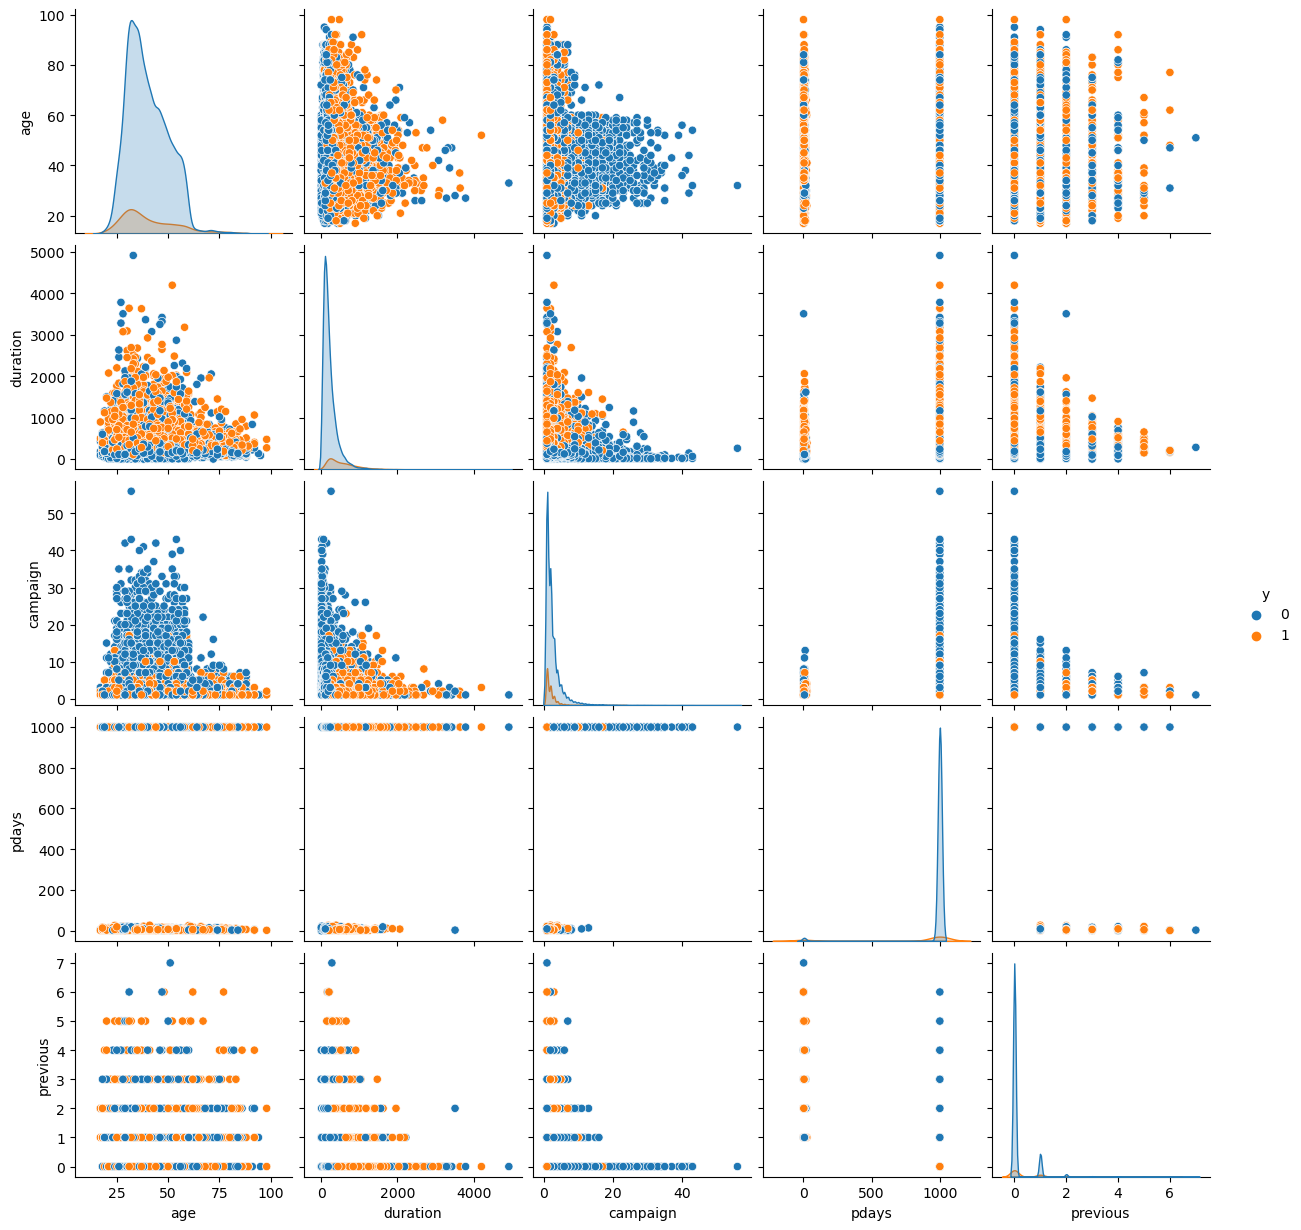

In [16]:
pairplt = df[['age', 'duration', 'campaign', 'pdays', 'previous', 'y']]
pairplt.loc[pairplt['y'] == 'yes', 'y'] = 1
pairplt.loc[pairplt['y'] == 'no', 'y'] = 0
sns.pairplot(pairplt, hue="y")

The primary business objective of this task is to develop a predictive model that can effectively identify potential customers who are most likely to subscribe to a term deposit product offered by a bank. By predicting the likelyhood of customer's subscription, banks can reduce cost, stratagize marketing tactics and increase subscription rates.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [17]:
categorical_columns = ['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome']
binary_columns = ['default', 'housing', 'loan']
label_encoder = LabelEncoder()

In [18]:
for column in binary_columns:
    df[column] = label_encoder.fit_transform(df[column])
df_encoded = pd.get_dummies(df, columns= categorical_columns, drop_first=True)

In [19]:
df_encoded['y'] = df_encoded['y'].map({'yes': True, 'no': False})

In [20]:
df_encoded.head()

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,0,0,0,261,1,999,0,1.1,93.994,...,True,False,False,False,True,False,False,False,True,False
1,57,1,0,0,149,1,999,0,1.1,93.994,...,True,False,False,False,True,False,False,False,True,False
2,37,0,2,0,226,1,999,0,1.1,93.994,...,True,False,False,False,True,False,False,False,True,False
3,40,0,0,0,151,1,999,0,1.1,93.994,...,True,False,False,False,True,False,False,False,True,False
4,56,0,0,2,307,1,999,0,1.1,93.994,...,True,False,False,False,True,False,False,False,True,False


In [21]:
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [23]:
dummy_clf = DummyClassifier().fit(X_train, y_train)
baseline_score = dummy_clf.score(X_test, y_test)
print('Baseline score to beat:', baseline_score)

Baseline score to beat: 0.8880256385354958


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [24]:
start_time = time.time()
lr = LogisticRegression(max_iter=1000).fit(X_train, y_train)
end_time = time.time()
lrt = end_time - start_time

### Problem 9: Score the Model

What is the accuracy of your model?

In [25]:
lrTS = lr.score(X_test, y_test)
lrTR = lr.score(X_train, y_train)
print("Logistic Regression test score:", lrTS)

Logistic Regression test score: 0.91162474507138


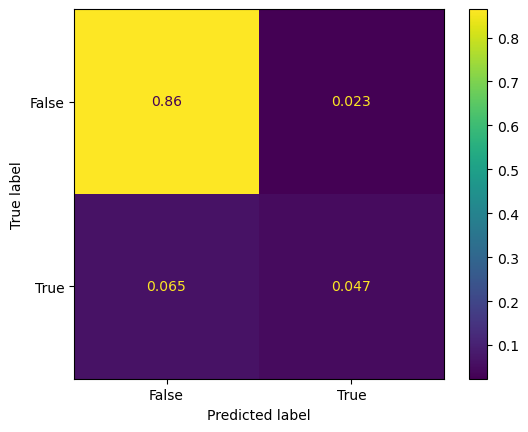

In [26]:
y_pred = lr.predict(X_test)
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize='all')
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)
disp.plot()

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [29]:
# Set up X and y values as contiguous so we can train it using KNN model
X_train_contiguous = np.ascontiguousarray(X_train)
X_test_contiguous = np.ascontiguousarray(X_test)
y_train_contiguous = np.ascontiguousarray(y_train)
y_test_contiguous = np.ascontiguousarray(y_test)
knn_model = KNeighborsClassifier()
# Use the contiguous arrays in your model
start_time = time.time()
knn_model.fit(X_train_contiguous, y_train_contiguous)
end_time = time.time()
knnt = end_time - start_time
knnTS = knn_model.score(X_test_contiguous, y_test_contiguous)
knnTR = knn_model.score(X_train_contiguous, y_train_contiguous)
print("KNN test score:", knnTS)

KNN test score: 0.9040497232203555


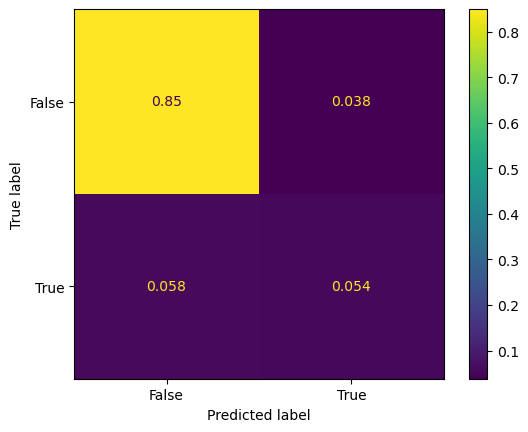

In [28]:
y_pred = knn_model.predict(X_test_contiguous)
# Compute the confusion matrix
cm = confusion_matrix(y_test_contiguous, y_pred, normalize='all')
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)
disp.plot()

In [30]:
#Calculate how long it takes to fit the model for future comparison
start_time = time.time()
svc = SVC().fit(X_train, y_train)
end_time = time.time()
svct = end_time - start_time
svcTS = svc.score(X_test, y_test)
svcTR = svc.score(X_train, y_train)
print("SVC test score:", svcTS)

SVC test score: 0.8967660483636011


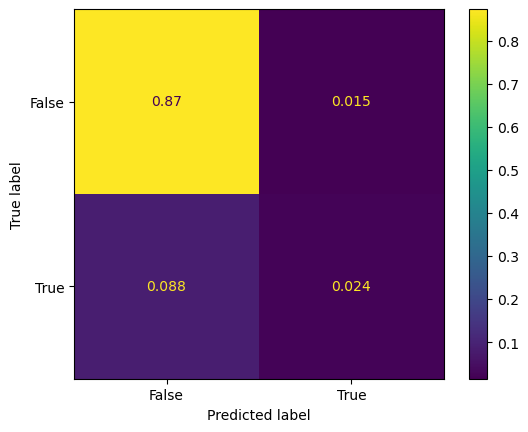

In [31]:
y_pred = svc.predict(X_test)
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize='all')
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()

In [32]:
#Calculate how long it takes to fit the model for future comparison
start_time = time.time()
dt = DecisionTreeClassifier().fit(X_train, y_train)
end_time = time.time()
dtt = end_time - start_time
dtTS = dt.score(X_test, y_test)
dtTR = dt.score(X_train, y_train)
print("Decision Tree test score:", dtTS)

Decision Tree test score: 0.8870544818879286


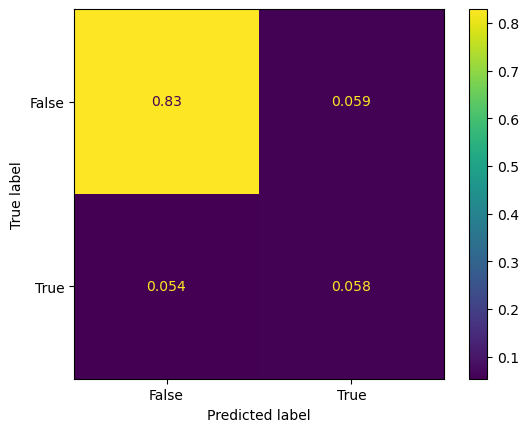

In [33]:
y_pred = dt.predict(X_test)
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize='all')
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()

In [34]:
# Build dataframe for all values to compare
data = {
    'Model': ['Logistic Regression','KNN','SVC','Decision Tree'],
    'Train Time': [lrt, knnt, svct, dtt],
    'Train Accuracy': [lrTR, knnTR, svcTR, dtTR],
    'Test Accuracy': [lrTS, knnTS, svcTS, dtTS]
}
result = pd.DataFrame(data)
result

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,2.002985,0.909682,0.911625
1,KNN,0.041043,0.931080,0.904050
2,SVC,18.886139,0.897964,0.896766
3,Decision Tree,0.253496,1.000000,0.887054


Using default settings, we see that SVC has the highest training time and Logistic regression performs the best. We can also suggest that all the models are overfitted except SVC by comparing the training and test accuracies.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

#### Hyperparameter tuning using GridSearchCV

In [35]:
param_grid_lr = {
    'penalty': ['l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [10000]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
}

param_grid_svc = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20],
}

In [36]:
#Set up all models for Hyperparameter tuning
model1 = LogisticRegression()
model2 = KNeighborsClassifier()
model3 = SVC()
model4 = DecisionTreeClassifier()

In [37]:
grid_lr = GridSearchCV(model1, param_grid=param_grid_lr, cv=5).fit(X_train, y_train)
lrTR = grid_lr.score(X_train, y_train)
lrTS = grid_lr.score(X_test, y_test)
mean_fit_time = grid_lr.cv_results_['mean_fit_time']
lrtime = np.mean(mean_fit_time)
print("Train score:",lrTR)
print("Test score:",lrTS)
print("Time:",lrtime)

Train score: 0.9104917289825516
Test score: 0.9117218607361367
Time: 1.9797588634490964


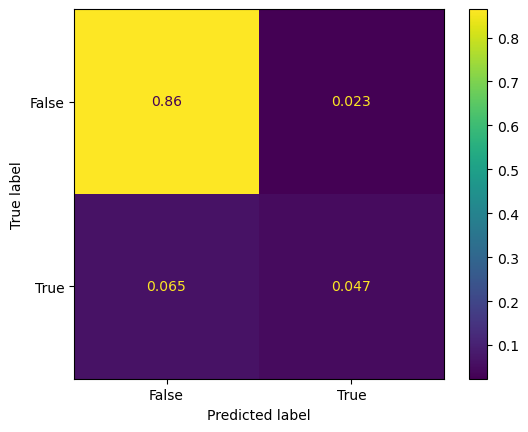

In [38]:
y_pred = grid_lr.predict(X_test)
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize='all')
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_lr.classes_)
disp.plot()

In [41]:
grid_knn = GridSearchCV(model2, param_grid=param_grid_knn, cv=5).fit(X_train_contiguous, y_train_contiguous)
knnTR = grid_knn.score(X_train_contiguous, y_train_contiguous)
knnTS = grid_knn.score(X_test_contiguous, y_test_contiguous)
mean_fit_time = grid_knn.cv_results_['mean_fit_time']
knntime = np.mean(mean_fit_time)
print("Train score:",knnTR)
print("Test score:",knnTS)
print("Time:",knntime)

Train score: 0.9183904697160985
Test score: 0.9135670583665145
Time: 0.049952401433672224


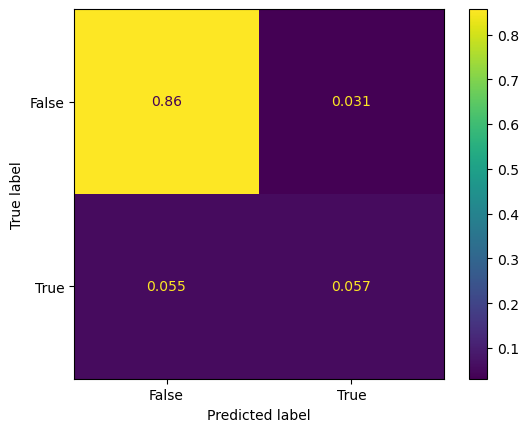

In [42]:
y_pred = grid_knn.predict(X_test_contiguous)
# Compute the confusion matrix
cm = confusion_matrix(y_test_contiguous, y_pred, normalize='all')
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_knn.classes_)
disp.plot()

In [49]:
grid_svc = GridSearchCV(model3, param_grid=param_grid_svc, cv=5).fit(X_train, y_train)
svcTR = grid_svc.score(X_train, y_train)
svcTS = grid_svc.score(X_test, y_test)
mean_fit_time = grid_svc.cv_results_['mean_fit_time']
svctime = np.mean(mean_fit_time)
print("Train score:",svcTR)
print("Test score:",svcTS)
print("Time:",svctime)

Train score: 0.9046971609854003
Test score: 0.9045353015441391
Time: 24.18806799888611


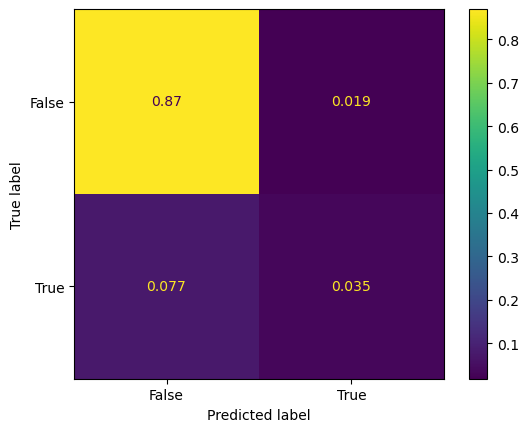

In [44]:
y_pred = grid_svc.predict(X_test)
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize='all')
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_svc.classes_)
disp.plot()

In [45]:
grid_dt = GridSearchCV(model4, param_grid=param_grid_dt, cv=5).fit(X_train, y_train)
dtTR = grid_dt.score(X_train, y_train)
dtTS = grid_dt.score(X_test, y_test)
mean_fit_time = grid_dt.cv_results_['mean_fit_time']
dttime = np.mean(mean_fit_time)
print("Train score:",dtTR)
print("Test score:",dtTS)
print("Time:",dttime)

Train score: 0.9170632222977566
Test score: 0.9160920656501894
Time: 0.11151143550872804


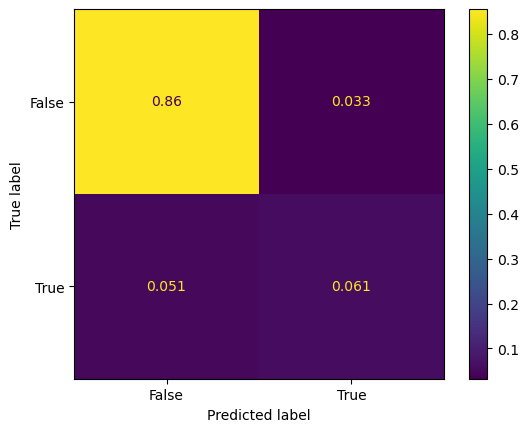

In [46]:
y_pred = grid_dt.predict(X_test)
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize='all')
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_dt.classes_)
disp.plot()

In [50]:
data = {
    'Model': ['Logistic Regression','KNN','SVC','Decision Tree'],
    'Train Time': [lrtime, knntime, svctime, dttime],
    'Train Accuracy': [lrTR, knnTR, svcTR, dtTR],
    'Test Accuracy': [lrTS, knnTS, svcTS, dtTS]
}
result = pd.DataFrame(data)
result

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,1.979759,0.910492,0.911722
1,KNN,0.049952,0.918390,0.913567
2,SVC,24.188068,0.904697,0.904535
3,Decision Tree,0.111511,0.917063,0.916092


SVC still has the highest training time but we can see all model's accuracy has increased overall and we can suggest that they are not overfitted by comparing the train and test accuracies. KNN and Decision Tree are the best models overall after tuning hyperparameters.

##### Questions